In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle
import matplotlib.pyplot as plt

In [78]:
## Load the dataset
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
## Preprocess the data
## Drop irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [80]:
## Checking for missing values

data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in the dataset. So, we don't have to deal with that.

DATA VISUALIZATION

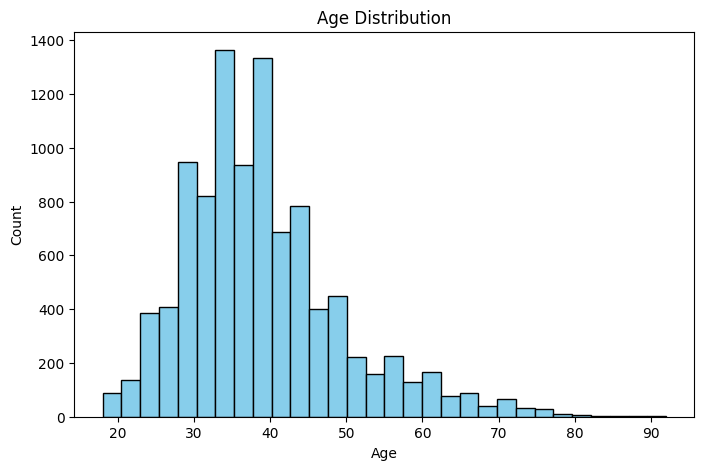

In [81]:
## Distribution of Age

plt.figure(figsize=(8, 5))
plt.hist(data['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 5))

Creates a new figure with a size of 8 inches wide and 5 inches tall.

This controls how big your chart will appear.

plt.hist(data['Age'], bins=30, color='skyblue', edgecolor='black')

Creates a histogram of the Age column from the data DataFrame.

bins=30: Divides the age range into 30 equal intervals (bins).

color='skyblue': Sets the fill color of the bars.

edgecolor='black': Adds black borders to each bar for better visibility.

A histogram shows how many values fall into each range of ages—great for understanding the distribution of a numeric variable.

plt.title('Age Distribution')

Sets the title of the plot at the top.

plt.xlabel('Age')

Labels the x-axis, which in this case is the age of customers.

plt.ylabel('Count')

Labels the y-axis, which represents how many customers fall into each age bin.

plt.show()

Displays the plot.

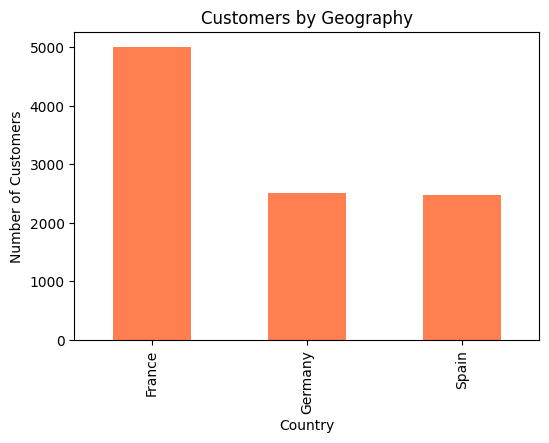

In [82]:
## Count of Customers by Geography

plt.figure(figsize=(6, 4))
data['Geography'].value_counts().plot(kind='bar', color='coral')
plt.title('Customers by Geography')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()


plt.figure(figsize=(6, 4))

This initializes a new plot (a figure) with a width of 6 inches and a height of 4 inches.

Controls the size of the chart.

data['Geography'].value_counts().plot(kind='bar', color='coral')

This line is the heart of the chart.

data['Geography']: Selects the 'Geography' column from the dataset.

.value_counts(): Counts how many times each country (e.g., France, Spain, Germany) appears.

.plot(kind='bar'): Plots those counts as a vertical bar chart.

color='coral': Sets the bar color to coral (a reddish-orange shade).

This line will create a bar for each country, with the height representing how many customers come from that country.

plt.title('Customers by Geography')

Sets the title of the bar chart.

plt.xlabel('Country')

Labels the x-axis, which will have the country names.

plt.ylabel('Number of Customers')

Labels the y-axis, which shows the number of customers per country.

plt.show()

Displays the plot.

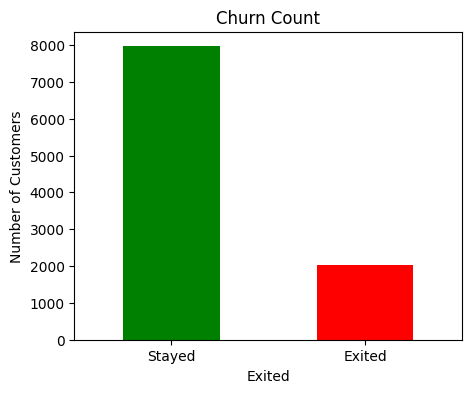

In [83]:
## Churn Count (Exited)

plt.figure(figsize=(5, 4))
data['Exited'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Churn Count')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Exited'], rotation=0)
plt.ylabel('Number of Customers')
plt.show()


plt.figure(figsize=(5, 4))

Initializes a new figure (plot window) that's 5 inches wide and 4 inches tall.

Controls the visual size of the output chart.

data['Exited'].value_counts().plot(kind='bar', color=['green', 'red'])

This creates a bar chart from the Exited column.

data['Exited']: Selects the churn column.

0 means the customer did not churn (stayed).

1 means the customer churned (left).

.value_counts(): Counts how many customers have 0 or 1 in that column.

.plot(kind='bar'): Plots those counts as a bar chart.

color=['green', 'red']: Colors the bars — green for stayed, red for exited.

plt.title('Churn Count')

Sets the title of the chart.

plt.xticks(ticks=[0, 1], labels=['Stayed', 'Exited'], rotation=0)

Customizes the x-axis tick labels:

ticks=[0, 1]: Positions of the bars.

labels=['Stayed', 'Exited']: Custom labels instead of 0/1.

rotation=0: Keeps the labels horizontal.

plt.ylabel('Number of Customers')

Labels the y-axis, which represents how many customers stayed or exited.


plt.show()

Displays the plot.

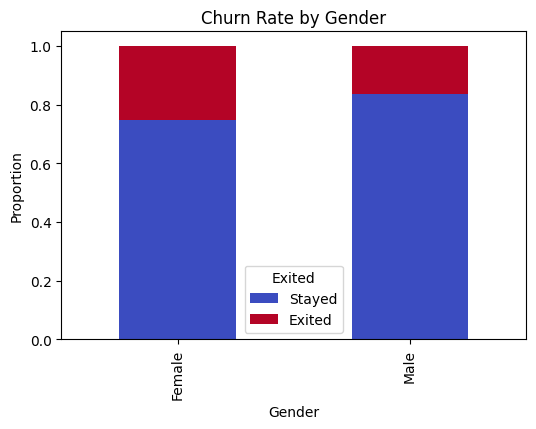

In [84]:
## Churn Rate by Gender

gender_churn = data.groupby('Gender')['Exited'].value_counts(normalize=True).unstack()
gender_churn.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')
plt.title('Churn Rate by Gender')
plt.ylabel('Proportion')
plt.legend(['Stayed', 'Exited'], title='Exited')
plt.show()


gender_churn = data.groupby('Gender')['Exited'].value_counts(normalize=True).unstack()

data.groupby('Gender'): Groups the dataset by the 'Gender' column (i.e., Male and Female).

['Exited']: We're focusing on the 'Exited' column within each gender group.

.value_counts(normalize=True): Counts the values of Exited as proportions (i.e., gives percentages instead of raw counts).

.unstack(): Converts the results into a DataFrame, where:

Rows = Gender (Male, Female)

Columns = Exited values (0 = Stayed, 1 = Exited)

Values = Proportions (sums to 1 for each gender)

 So gender_churn looks like this:

Gender	0 (Stayed)	1 (Exited)
Female	0.75	0.25
Male	0.82	0.18

gender_churn.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

Plots a stacked bar chart where each bar represents a gender.

The bar is divided into segments:

One for Stayed (Exited = 0)

One for Exited (Exited = 1)

stacked=True: Ensures the segments are on top of each other instead of side-by-side.

figsize=(6, 4): Sets chart size.

colormap='coolwarm': Gives nice contrasting colors for the two segments.

plt.title('Churn Rate by Gender')

Adds a descriptive title.

plt.ylabel('Proportion')

Labels the y-axis, which now shows proportions (from 0 to 1).

plt.legend(['Stayed', 'Exited'], title='Exited')

Customizes the legend to clearly show which color corresponds to which churn status.

plt.show()

Renders the chart.

<Figure size 700x500 with 0 Axes>

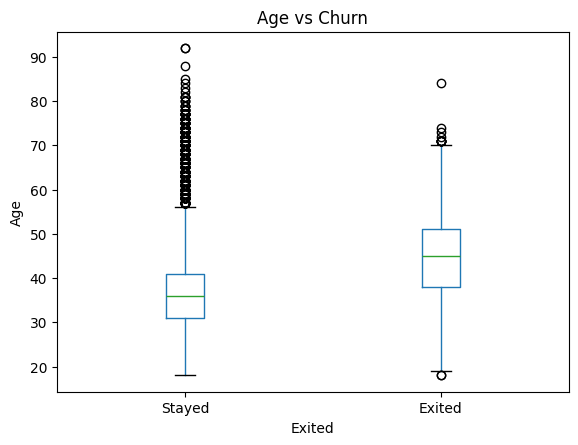

In [85]:
## Boxplot: Age vs Exited

plt.figure(figsize=(7, 5))
data.boxplot(column='Age', by='Exited', grid=False)
plt.title('Age vs Churn')
plt.suptitle('')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.xticks([1, 2], ['Stayed', 'Exited'])
plt.show()


plt.figure(figsize=(7,5))

Creates a new figure with a size of 7 inches wide and 5 inches tall.

data.boxplot(column='Age', by='Exited', grid=False)

This is the main plot line.

column='Age': We're plotting the 'Age' variable.

by='Exited': We're grouping ages by the 'Exited' column:

0 = Stayed

1 = Exited

This will create two boxplots side by side:

One for customers who stayed

One for customers who churned

grid=False: Turns off the background grid for a cleaner look.

 A boxplot shows:

Median (the middle line inside the box)

Interquartile range (IQR) (the box)

Whiskers (range within 1.5×IQR)

Outliers (points beyond the whiskers)

This helps visualize differences in age distributions between the two groups.

plt.title('Age vs Churn')

Adds the main title of the chart.

plt.suptitle('')

Suppresses the default subtitle that pandas adds ("Boxplot grouped by Exited").

This line just cleans up the title area.

plt.xlabel('Exited')

Labels the x-axis (which shows 0 and 1 for stayed and exited).

plt.ylabel('Age')

Labels the y-axis (which shows age values).

plt.xticks([1, 2], ['Stayed', 'Exited'])

Customizes the x-axis ticks:

1 becomes 'Stayed'

2 becomes 'Exited'

This makes the plot more readable for humans.

plt.show()

Displays the plot.

 Summary

This code shows how age differs between customers who stayed vs. exited using a boxplot. You can quickly compare:

Which group has older or younger customers

Whether churn is related to age

Outliers in each group

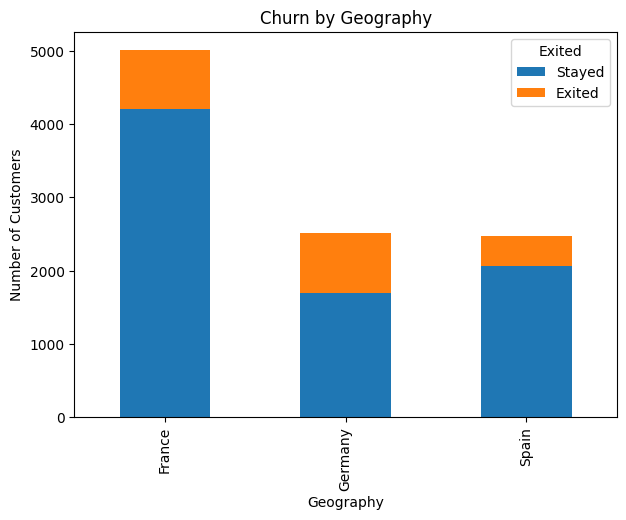

In [86]:
## Churn by Geography

geo_exit = data.groupby('Geography')['Exited'].value_counts().unstack()
geo_exit.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.title('Churn by Geography')
plt.ylabel('Number of Customers')
plt.legend(['Stayed', 'Exited'], title='Exited')
plt.show()


geo_exit = data.groupby('Geography')['Exited'].value_counts().unstack()

data.groupby('Geography'): Groups the dataset by the 'Geography' column (e.g., France, Germany, Spain).

['Exited']: We're looking at the 'Exited' column inside each country group.

.value_counts(): Counts how many customers stayed (0) and exited (1) within each country.

.unstack(): Converts the grouped data into a DataFrame with:

Rows = Countries

Columns = 0 (Stayed) and 1 (Exited)

Values = Number of customers

Example output of geo_exit might look like:

Geography	0 (Stayed)	1 (Exited)
France	         3000	   500
Germany	         1200	   800
Spain	         1500	   200

geo_exit.plot(kind='bar', stacked=True, figsize=(7, 5))

Creates a stacked bar chart from the geo_exit DataFrame.

kind='bar': Makes a vertical bar chart.

stacked=True: Stacks the two churn categories (Stayed and Exited) on top of each other.

figsize=(7, 5): Sets the size of the figure (7 inches wide, 5 inches tall).

Each bar represents a country, split into:

Stayed (Exited = 0)

Exited (Exited = 1)

plt.title('Churn by Geography')

Adds the title to the chart.

plt.ylabel('Number of Customers')

Labels the y-axis, which shows the total number of customers from each country.

plt.legend(['Stayed', 'Exited'], title='Exited')

Adds a legend showing which color represents stayed vs exited.

title='Exited' makes the legend more descriptive.

plt.show()

Renders the chart.


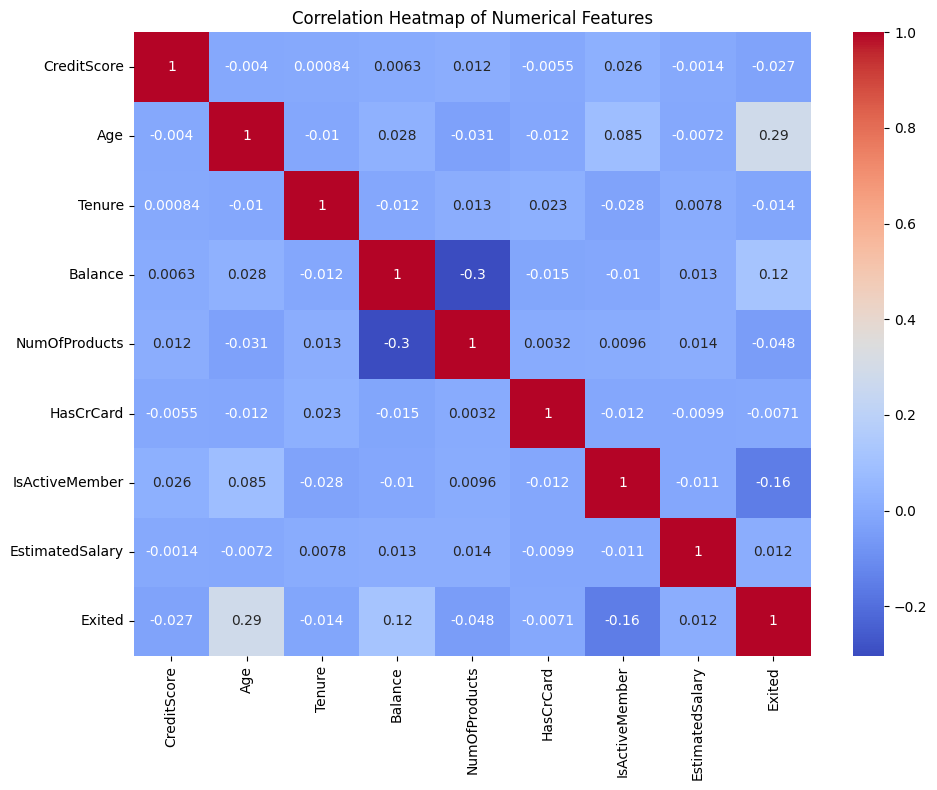

In [87]:
## Heatmap for numeric columns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr = data.corr(numeric_only=True)

# Set the figure size and style
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()



In [88]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])

In [89]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [90]:
## OneHot encode Geography column
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder(sparse_output=False)
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']])

In [91]:
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [92]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [93]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))

In [94]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)

In [95]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [96]:
## Save the encoders and scalar

with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)    
    

In [97]:
## Divide the dataset into independent and dependent features

X=data.drop('Exited',axis=1)
y=data['Exited']

## Split the data in training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Scale the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [98]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [99]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

ANN IMPLEMENTATION

In [100]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [101]:
X_train.shape[1]

12

In [102]:
## Build our ANN Model

model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 connected with input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,activation='sigmoid') ## Output Layer
])

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
import keras
opt=keras.optimizers.Adam(learning_rate=0.01)
loss=keras.losses.BinaryCrossentropy()

In [ ]:
## Compile the model for backpropagation and updating weights

'''model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])'''

"model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])"

In [ ]:
## Set up the Trensorboard

'''log_dir='logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorfow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)'''

"log_dir='logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')\ntensorfow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)"

In [ ]:
## Set up Early Stopping

early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)



In [ ]:
## Training the model

'''history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorfow_callback,early_stopping_callback]
)'''

'history=model.fit(\n    X_train,y_train,validation_data=(X_test,y_test),epochs=100,\n    callbacks=[tensorfow_callback,early_stopping_callback]\n)'

In [ ]:
'''model.save('model.h5')'''

"model.save('model.h5')"

In [ ]:
## Load Tensorboard Extension

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs/fit --port 0

Reusing TensorBoard on port 56119 (pid 16104), started 0:00:10 ago. (Use '!kill 16104' to kill it.)

In [ ]:
!taskkill /PID 16104 /F


SUCCESS: The process with PID 16104 has been terminated.
